Patika Data Project
Hasan Furkan Çolak

In [38]:
# intialize libraries 
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
import math
import matplotlib.pyplot as plt
%matplotlib inline


In [25]:
#read data
df = pd.read_csv("/media/hasanfurkan/Data/PY/patika_data_projects/energy_efficiency/ENB2012_data.csv")
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [33]:
#make data clear
df.rename(columns={
    "X1": "Relative_Compactness",
    "X2": "Surface_Area",
    "X3": "Wall_Area",
    "X4": "Roof_Area",
    "X5": "Overall_Height",
    "X6": "Orientation",
    "X7": "Glazing_Area",
    "X8": "Glazing_Area_Distribution",
    "Y1": "Heating_Load",
    "Y2": "Cooling_Load"
    },inplace=True)

<AxesSubplot:>

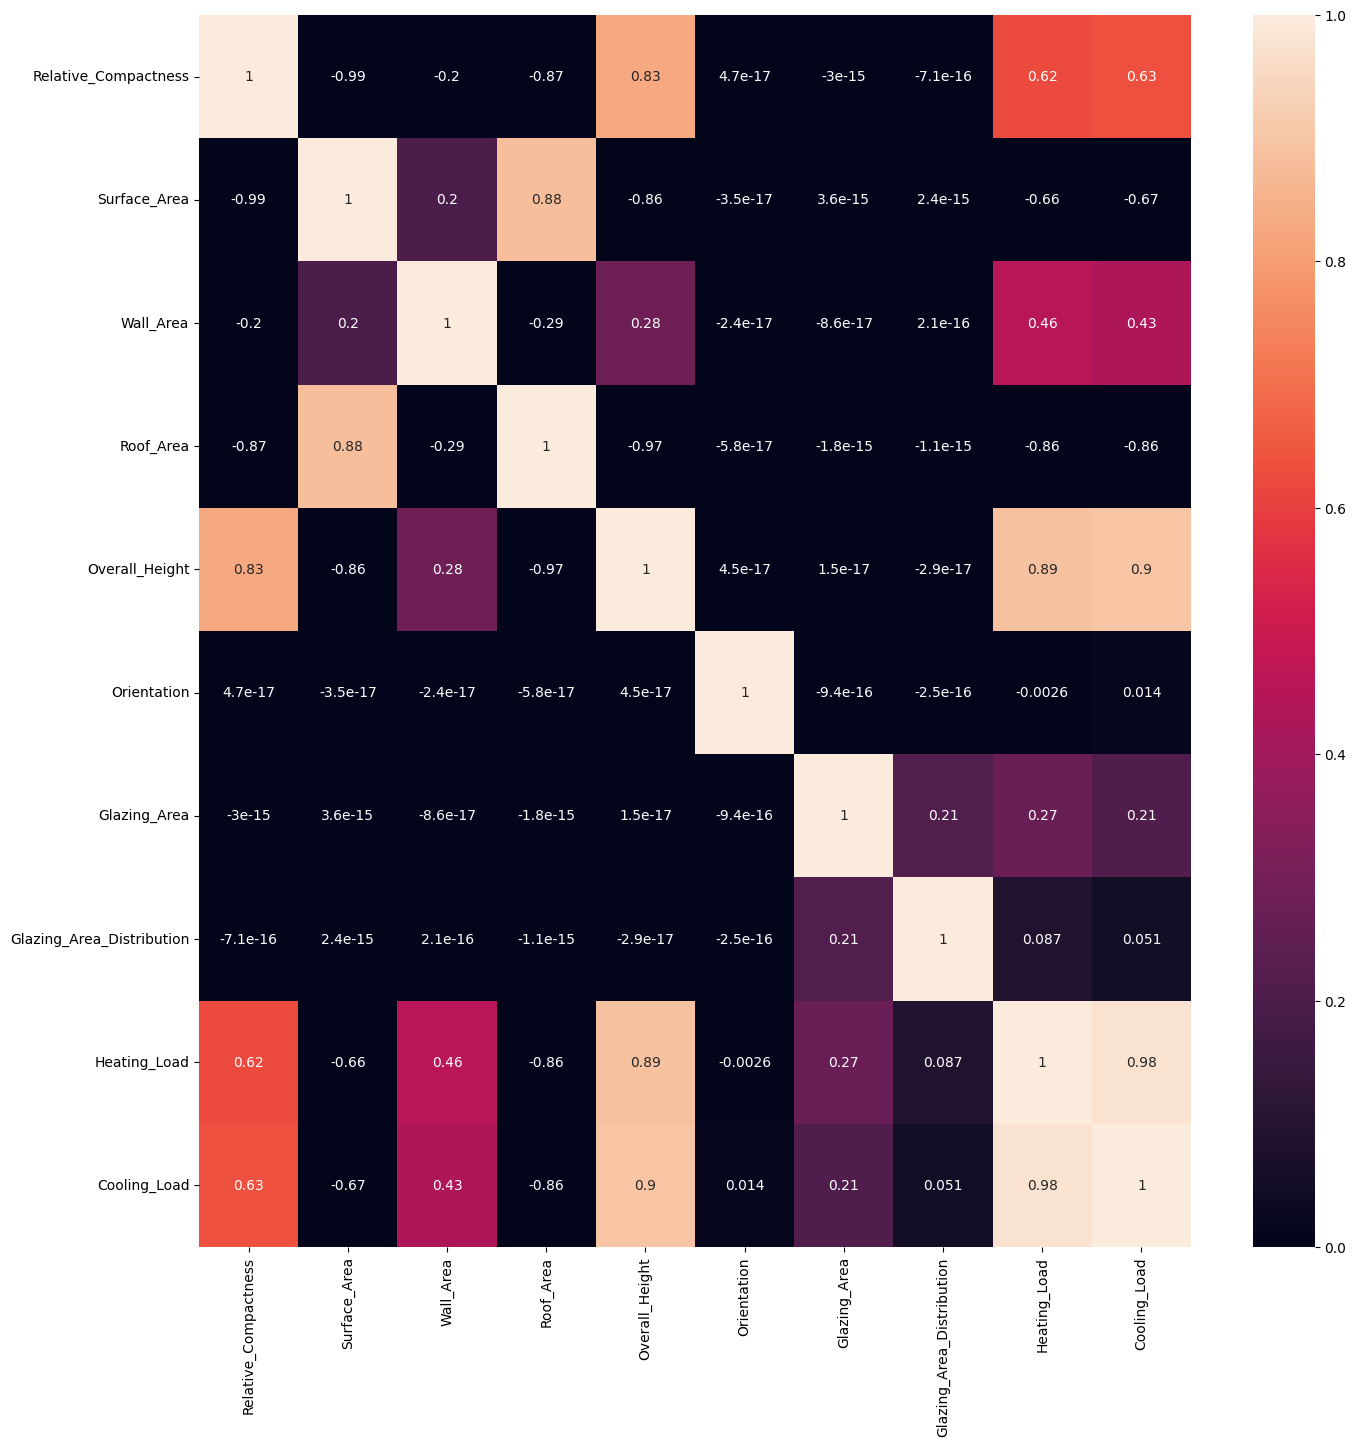

In [41]:
#visualize reationships of variables
corr = df.corr()
plt.figure(figsize = (16,16))
sns.heatmap(corr,vmin=0,vmax=1,annot=True)


In [48]:
#split the data
y = df.iloc[:,8:]
x = df.iloc[:,:8]
y1 = y.iloc[:,:1]
y2 = y.iloc[:,1:]

In [49]:
#split the data for train and test
from fast_ml.model_development import train_test_split
x_train,x_test,y_train1,y_test1,y_train2,y_test2 = train_test_split(x,y1,y2,test_size=0.2, random_state=0)

In [51]:
#call reandomforrestregressor 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(x_train,y_train1)
regressor.score(x_train,y_train1)
regressor.fit(x_train,y_train2)
regressor.score(x_train,y_train2)

0.9996988936302156

In [32]:
#define function for rmse
def rmse(x,y):
    return math.sqrt(((x-2)**2).mean())

In [53]:
#function for scores
def print_score(regressor):
    print(f"RMSE of train set Heating: {rmse(m.predict(x_train),y_train1)}")
    print(f"RMSE of train set Cooling: {rmse(m.predict(x_train),y_train2)}")
    print(f"RMSE of test set Heating: {rmse(m.predict(x_test),y_test1)}")
    print(f"RMSE of test set Cooling: {rmse(m.predict(x_test),y_test2)}")
    print(f"R^2 of train set Heating: {m.score(x_train,y_train1)}")
    print(f"R^2 of train set Cooling: {m.score(x_train,y_train2)}")
    print(f"R^2 of test set Heating: {m.score(x_test,y_test1)}")
    print(f"R^2 of test set Cooling: {m.score(x_test,y_test2)}")

In [55]:
#print scores
print_score(regressor)

RMSE of train set Heating: 24.397671460109127
RMSE of train set Cooling: 24.397671460109127
RMSE of test set Heating: 24.91921887798184
RMSE of test set Cooling: 24.91921887798184
R^2 of train set Heating: 0.9135138335280815
R^2 of train set Cooling: 0.9955585916032742
R^2 of test set Heating: 0.9346257874013368
R^2 of test set Cooling: 0.9672745347407999
